In [1]:
from model.diffusion import FEADataset, Trainer

/home/namanwsl/anaconda3/envs/fea/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = FEADataset(
    folder='feadata2500',
    augmentation=False,
)
print(len(dataset))

100000


In [17]:
index = 999
sample = dataset[index]
for key, value in sample.items():
    print(key, value.shape)
print(sample['plate_index'], sample['condition_index'], sample['iteration_index'])

geometry torch.Size([1, 256, 256])
plate_index torch.Size([])
condition_index torch.Size([])
iteration_index torch.Size([])
previous_iteration torch.Size([2, 256, 256])
displacement torch.Size([2, 256, 256])
constraints torch.Size([1, 256, 256])
forces torch.Size([2, 256, 256])
tensor(25) tensor(4) tensor(10)


In [18]:
sample['iteration_index'].shape.numel()

1

In [19]:
import torchvision.transforms.functional as TF
def unnormalize_from_negative_one_to_one(tensor):
        return (tensor + 1.0) / 2.0
def create_view_friendly_image(image):
        image = unnormalize_from_negative_one_to_one(image)
        image = image * 255.0
        image = TF.invert(image)
        # image = image.repeat(3, 1, 1)
        return image
        # image = TF.to_pil_image(image)

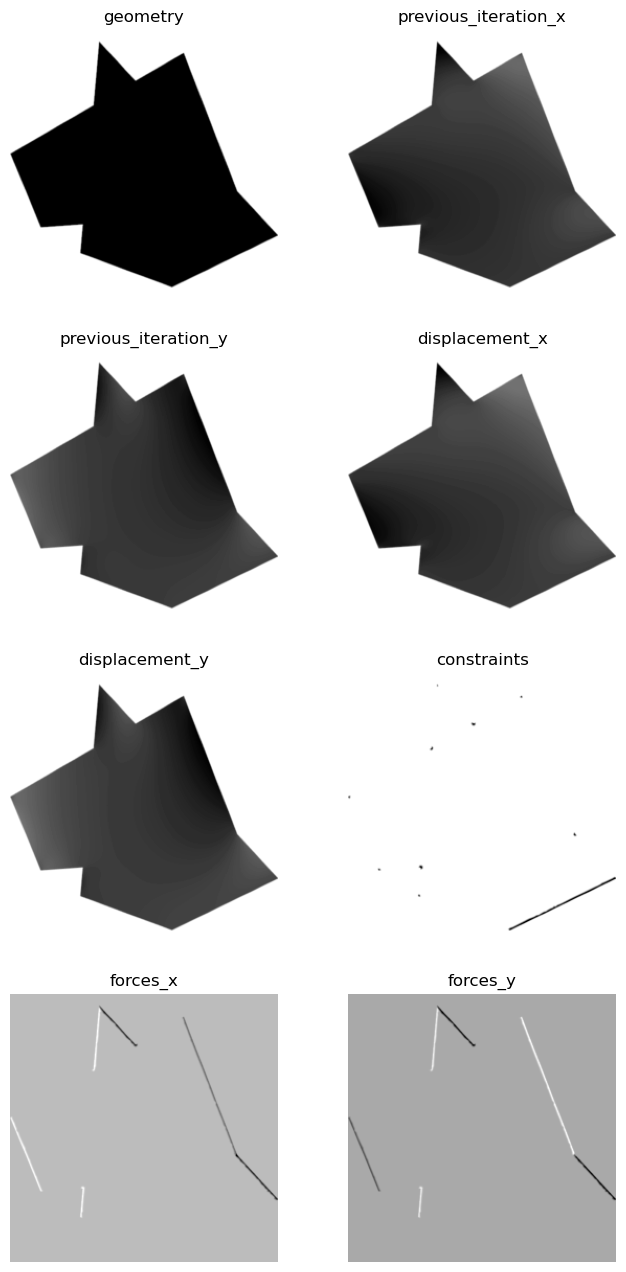

In [20]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(8, 16))
index = 1
for key, value in sample.items():
    if value.shape.numel() == 1:
        continue
    if value.shape[0] == 2:
        figure.add_subplot(4, 2, index)
        plt.title(key + "_x")
        plt.axis("off")
        plt.imshow(create_view_friendly_image(value[0][None, ...]).squeeze(), cmap='gray')
        index += 1
        figure.add_subplot(4, 2, index)
        plt.title(key + "_y")
        plt.axis("off")
        plt.imshow(create_view_friendly_image(value[1][None, ...]).squeeze(), cmap='gray')
        index += 1
    else:
        figure.add_subplot(4, 2, index)
        plt.title(key)
        plt.axis("off")
        plt.imshow(create_view_friendly_image(value[0][None, ...]).squeeze(), cmap='gray')
        index += 1
        